Building prefix dict from C:\Users\sino4\Python\prg\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\sino4\AppData\Local\Temp\jieba.uab35a8fad7f197c6330f599cdccb1efd.cache



#今日卡通《蠟筆小新- 這是我的秘密小屋哦》【  怡兒】 - YouTubehttps://www.youtube.com › watch

#今日卡通《蠟筆小新- 改建小白的屋子》【  怡兒】 - YouTubehttps://www.youtube.com › watch

#今日卡通《蠟筆小新- 令人期待的小葵未來》【  怡兒】 - YouTubehttps://www.youtube.com › watch

蠟筆小新[930] 坦白大會哦＆不會拒絕的媽媽哦- YouTubehttps://www.youtube.com › watch

蜡笔小新- 维基百科，自由的百科全书https://zh.wikipedia.org › zh-tw › 蜡笔小新
蠟筆小新- Home | Facebookhttps://www.facebook.com › Pages › Media › TV & Movies › Movie
蜡笔小新Crayon Shin Chan - Home | Facebookhttps://www.facebook.com › Pages › Public Figure › Blogger
「你真的看懂《蠟筆小新》了嗎？」資深粉絲的一句話讓許多人感觸良多 ...https://inmywordz.com › archives
蠟筆小新(677-755集)-動漫-高清影音線上看-愛奇藝台灣站https://tw.iqiyi.com › ...
#今日卡通《蠟筆小新- 這是我的秘密小屋哦》【  怡兒】 - YouTubehttps://www.youtube.com › watch#今日卡通《蠟筆小新- 改建小白的屋子》【  怡兒】 - YouTubehttps://www.youtube.com › watch#今日卡通《蠟筆小新- 令人期待的小葵未來》【  怡兒】 - YouTubehttps://www.youtube.com › watch蠟筆小新[930] 坦白大會哦＆不會拒絕的媽媽哦- YouTubehttps://www.youtube.com › watch蜡笔小新- 维基百科，自由的百科全书https://zh.wikipedia.org › zh-tw › 蜡笔小新蠟筆小新- Home | Facebookhttps://

Loading model cost 1.200 seconds.
Prefix dict has been built succesfully.


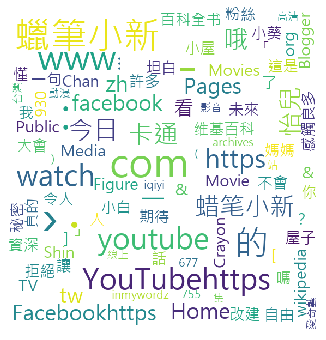

In [7]:
import requests
from bs4 import BeautifulSoup

# Google 搜尋 URL
google_url = 'https://www.google.com.tw/search'

# 查詢參數
my_params = {'q': '蠟筆小新'}

# 下載 Google 搜尋結果
r = requests.get(google_url, params = my_params)

# 確認是否下載成功
if r.status_code == requests.codes.ok:
  # 以 BeautifulSoup 解析 HTML 原始碼
  soup = BeautifulSoup(r.text, 'html.parser')

  # 觀察 HTML 原始碼
  #print(soup.prettify())

  # 以 CSS 的選擇器來抓取 Google 的搜尋結果
  items = soup.select('div.kCrYT > a[href^="/url"]')
 
  for i in items:
    # 標題
    print(i.text)
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

#讀取文字檔資料
#text = open('news1.txt', "r",encoding="utf-8").read()  #讀文字資料

#讀取Google資料

text = ''
for i in items:
    # 標題
    text = text + i.text
print( text)

jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
#with open('dictionary/stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量
#print(diction)

#font = "C:\\Windows\\Fonts\\simsun.ttc"  #設定字型(宋體)
font = "C:\\Windows\\Fonts\\MSJH.ttc"  #設定字型(宋體)
#wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\simsun.ttc")

mask = np.array(Image.open("go.png"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")  #存檔